In [2]:
#Definir archivo a importar

filename = "Transacción de muestra.txt"
data = open(filename, "r", encoding="utf-8")
read_data = data.read()
print(read_data)

************************ DATOS DE LA TRANSACCIÓN ***************************
Empresa: EjemploCorp
Fecha del Reporte: 2024-02-03
Número de Sucursal: 12345

ID_Transaccion, Fecha, Producto, Cantidad, Precio, Categoria, ID_Cliente, Notas
1, 2024-01-20, ProductoA, 5, 10.50, Electrónica, 101, -
2, 2024-01-21, ProductoB, 2, 15.75, Ropa, 102, -
3, 2024-01-22, ProductoC, 8, 7.20, Hogar, 103, -
4, 2024-01-23, ProductoA, 3, 10.50, Electrónica, 104, -
5, 2024-01-23, ProductoB, 1, 15.75, Ropa, 105, -
6, 2024-01-24, ProductoC, 4, 7.20, Hogar, 106, -
7, 2024-01-25, ProductoA, 6, 10.50, Electrónica, 107, -
8, 2024-01-25, ProductoB, 3, 15.75, Ropa, 108, -
9, 2024-01-26, ProductoC, 2, 7.20, Hogar, 109, -
10, 2024-01-27, ProductoA, 4, 10.50, Electrónica, 110, -
11, 2024-01-27, ProductoB, 5, 15.75, Ropa, 111, -
12, 2024-01-28, ProductoC, 7, 7.20, Hogar, 112, -
13, 2024-01-29, ProductoA, 2, 10.50, Electrónica, 113, -
14, 2024-01-29, ProductoB, 1, 15.75, Ropa, 114, -
15, 2024-01-30, ProductoC, 3, 7.20, Hog

In [3]:
#Funcion para optener transacciones en un dataframe con pandas
import pandas as pd

def get_transactions_data(strData):
    data_array = []
    isTransaction = False
    for line in strData.split("\n"):
        if "ID_Transaccion" in line or isTransaction == True:
            isTransaction = True
            data_line = line.split(", ")
            data_array.append(data_line)

    df = pd.DataFrame(data_array)
    df.columns = df.iloc[0]
    df = df.drop([0])
    df = df.dropna()
    df = df.reset_index(drop = True)
    return df

transaction_data = get_transactions_data(read_data)
transaction_data

,ID_Transaccion,Fecha,Producto,Cantidad,Precio,Categoria,ID_Cliente,Notas
0,1,2024-01-20,ProductoA,5,10.50,Electrónica,101,-
1,2,2024-01-21,ProductoB,2,15.75,Ropa,102,-
2,3,2024-01-22,ProductoC,8,7.20,Hogar,103,-
3,4,2024-01-23,ProductoA,3,10.50,Electrónica,104,-
4,5,2024-01-23,ProductoB,1,15.75,Ropa,105,-
5,6,2024-01-24,ProductoC,4,7.20,Hogar,106,-
6,7,2024-01-25,ProductoA,6,10.50,Electrónica,107,-
7,8,2024-01-25,ProductoB,3,15.75,Ropa,108,-
8,9,2024-01-26,ProductoC,2,7.20,Hogar,109,-
9,10,2024-01-27,ProductoA,4,10.50,Electrónica,110,-


In [4]:
#Obtener valores de incio del txt
def get_value_by_keyword(strData, strKeyword):
    for line in strData.split("\n"):
        if strKeyword in line:
            data_value = line.split(": ")
            value = data_value[1]
            break
    return value

print(get_value_by_keyword(read_data, "Empresa"))
print(get_value_by_keyword(read_data, "Fecha del Reporte"))
print(get_value_by_keyword(read_data, "Número de Sucursal"))


EjemploCorp
2024-02-03
12345


In [5]:
#Almacenar en diccionario de pyhton 
def get_report_data(strData):
    out_dict = {"Empresa": "",
                "Fecha": "",
                "Sucursal": "",
                "Transacciones": None}
    
    out_dict["Empresa"] = get_value_by_keyword(strData, "Empresa")
    out_dict["Fecha"] = get_value_by_keyword(strData, "Fecha del Reporte")
    out_dict["Sucursal"] = get_value_by_keyword(strData, "Número de Sucursal")
    out_dict["Transacciones"] = get_transactions_data(strData)
    
    return out_dict

report_data = get_report_data(read_data)
report_data["Transacciones"]


,ID_Transaccion,Fecha,Producto,Cantidad,Precio,Categoria,ID_Cliente,Notas
0,1,2024-01-20,ProductoA,5,10.50,Electrónica,101,-
1,2,2024-01-21,ProductoB,2,15.75,Ropa,102,-
2,3,2024-01-22,ProductoC,8,7.20,Hogar,103,-
3,4,2024-01-23,ProductoA,3,10.50,Electrónica,104,-
4,5,2024-01-23,ProductoB,1,15.75,Ropa,105,-
5,6,2024-01-24,ProductoC,4,7.20,Hogar,106,-
6,7,2024-01-25,ProductoA,6,10.50,Electrónica,107,-
7,8,2024-01-25,ProductoB,3,15.75,Ropa,108,-
8,9,2024-01-26,ProductoC,2,7.20,Hogar,109,-
9,10,2024-01-27,ProductoA,4,10.50,Electrónica,110,-


In [28]:
#crear funcion para manipulacion de los datos
def get_data_analyst_resume(df_input):
    #una copia para no alterar el df original
    df = df_input.copy()
    #Cambiar el nombre de la columna precio a precio unitario
    df = df.rename(columns = {"Precio":"Precio unitario"})
    #Crear una nueva columna llamada 'Total de venta' que sea el total de la cantidad multiplicada el precio
    df["Cantidad"] = df["Cantidad"].astype(float)
    df["Precio unitario"] = df["Precio unitario"].astype(float)
    df["Total de venta"] = df["Cantidad"] * df["Precio unitario"]
    #Obtener el total de venta por cada categoria
    df_sales_by_category = df[["Categoria", "Total de venta"]].groupby('Categoria').sum()
    #crear las columnas de mes dia y año
    df["Fecha"] = pd.to_datetime(df["Fecha"], yearfirst = True)
    df["Mes"] = df["Fecha"].dt.month
    df["Año"] = df["Fecha"].dt.year
    df["Dia"] = df["Fecha"].dt.day
    #Obtener el producto y fecha con mas ventas
    max_sold_index = df["Total de venta"].idxmax()
    most_sold_product = df.iloc[max_sold_index]["Producto"]
    most_sold_date = df.iloc[max_sold_index]["Fecha"]
    #diccionario de salida con todos los datos filtrados
    out_dict = {"data": df, 
               "sales_by_category":df_sales_by_category,
               "most_sold_info": {"product": most_sold_product, "date": most_sold_date}}
    
    return out_dict
    
get_data_analyst_resume = get_data_analyst_resume(report_data["Transacciones"])
get_data_analyst_resume["sales_by_category"]


,Total de venta
Categoria,
Electrónica,325.5
Hogar,208.8
Ropa,283.5


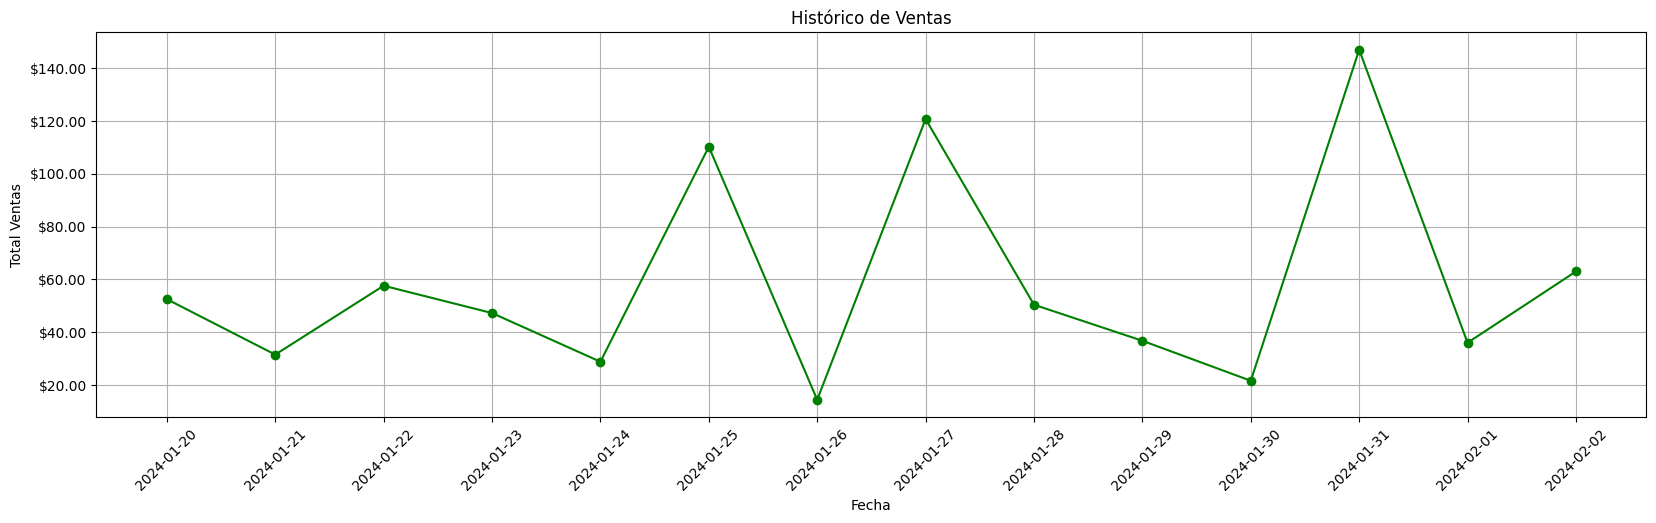

In [56]:
#Graficar el historico de ventas por dia (Grafico Lineal)
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

def plot_historical_sales(dfi):
    df = dfi.copy()
    df = df[["Fecha", "Total de venta"]].groupby('Fecha').sum()
    df = df.reset_index()
    #crear figura del grafico
    plt.figure(figsize=(20,5))
    plt.plot(df["Fecha"], df["Total de venta"], marker = "o", color = "green")
    plt.xlabel("Fecha")
    plt.ylabel("Total Ventas")
    plt.grid(True)
    plt.xticks(df["Fecha"], rotation=45)
    plt.title("Histórico de Ventas")

    formatter = FuncFormatter(lambda x, _: "${:,.2f}".format(x))
    plt.gca().yaxis.set_major_formatter(formatter)
    
    plt.show()
    return 

plot_historical_sales(get_data_analyst_resume["data"])



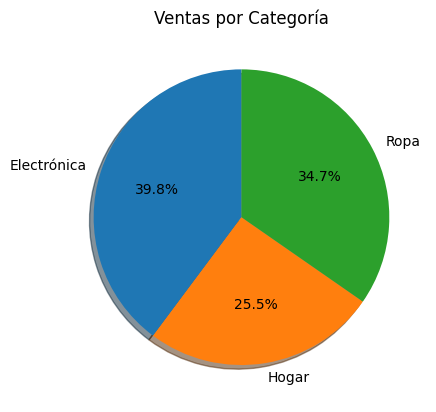

,Categoria,Total de venta
0,Electrónica,325.5
1,Hogar,208.8
2,Ropa,283.5


In [32]:
#Graficar el numero de productos vendidos por cada categoria (grafico circular)

def plot_sales_by_category(dfi):
    df = dfi.copy()
    df = df.reset_index()
    #crear grafica
    plt.title("Ventas por Categoría")
    plt.pie(df["Total de venta"], labels = df["Categoria"], shadow=True, autopct='%1.1f%%', startangle=90, colors = [])
    plt.show()
    
    return df

plot_sales_by_category(get_data_analyst_resume["sales_by_category"])

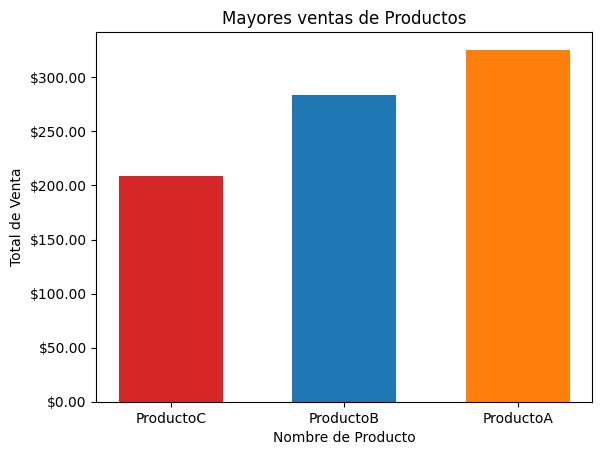

In [55]:
#Graficar los productos de mayor a menor ventas (Grafico de Barras)

def plt_sales_by_product(dfi):
    bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
    df = dfi.copy()
    df = df[["Producto", "Total de venta"]].groupby('Producto').sum()
    df = df.reset_index()
    df = df.sort_values(by = "Total de venta")

    plt.bar(df["Producto"], df["Total de venta"], color = bar_colors, width = 0.6)
    plt.ylabel('Total de Venta')
    plt.xlabel('Nombre de Producto')
    plt.title('Mayores ventas de Productos', )

    formatter = FuncFormatter(lambda x, _: "${:,.2f}".format(x))
    plt.gca().yaxis.set_major_formatter(formatter)
    
    plt.show()
    
    return

plt_sales_by_product(get_data_analyst_resume["data"])







